In [2]:
import matplotlib.pyplot as plt
import numpy as np
import lsdb
from dask.distributed import Client
from pathlib import Path
print("Imported Libraries.")

Imported Libraries.


In [4]:
CATALOG_DIR = Path('../../../catalogs')
GAIA_100_NAME = 'gaia_dr3_pm_greater_100'
GAIA_100_DIR = CATALOG_DIR / GAIA_100_NAME

In [5]:
with Client():
    gaia_pm_greater_100 = (
                lsdb.read_hats(GAIA_100_DIR)
                .query('phot_g_mean_mag > 17 or phot_g_mean_mag.isna()')
                .compute()
    )
print('Num Objs:', len(gaia_pm_greater_100))
gaia_pm_greater_100

2025-06-10 15:13:11,708 - distributed.worker - ERROR - Failed to communicate with scheduler during heartbeat.
Traceback (most recent call last):
  File "/ocean/projects/phy210048p/jpassos/conda-venvs/lsdb-main/lib/python3.12/site-packages/distributed/comm/tcp.py", line 226, in read
    frames_nosplit_nbytes_bin = await stream.read_bytes(fmt_size)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
tornado.iostream.StreamClosedError: Stream is closed

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/ocean/projects/phy210048p/jpassos/conda-venvs/lsdb-main/lib/python3.12/site-packages/distributed/worker.py", line 1269, in heartbeat
    response = await retry_operation(
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/ocean/projects/phy210048p/jpassos/conda-venvs/lsdb-main/lib/python3.12/site-packages/distributed/utils_comm.py", line 416, in retry_operation
    return await retry(
           ^^^^^^^^^^^^
  File "/

Num Objs: 231421


,source_id,ra,dec,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
_healpix_29,,,,,,,,
11263149338793,22505628703872,44.731521,0.288573,112.792047,1.26133,19.015398,19.926874,18.12902
17182928642089,34359738843008,44.931877,0.509426,74.450001,-68.944793,19.583107,20.864212,18.43101
...,...,...,...,...,...,...,...,...
3458757945575864316,6917515872156470272,314.739464,-0.353317,8.54069,-117.162695,17.401062,<NA>,<NA>
3458760482512664599,6917520953104346112,315.084037,-0.224119,76.31283,-67.661647,19.035961,20.642557,17.747444


In [7]:
gaia_pm_greater_100['pm_total'] = ((gaia_pm_greater_100['pmra'])**2 + (gaia_pm_greater_100['pmdec'])**2)**0.5
gaia_pm_greater_100

,source_id,ra,dec,pmra,pmdec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,pm_total
_healpix_29,,,,,,,,,
11263149338793,22505628703872,44.731521,0.288573,112.792047,1.26133,19.015398,19.926874,18.12902,112.7991
17182928642089,34359738843008,44.931877,0.509426,74.450001,-68.944793,19.583107,20.864212,18.43101,101.470129
...,...,...,...,...,...,...,...,...,...
3458757945575864316,6917515872156470272,314.739464,-0.353317,8.54069,-117.162695,17.401062,<NA>,<NA>,117.473573
3458760482512664599,6917520953104346112,315.084037,-0.224119,76.31283,-67.661647,19.035961,20.642557,17.747444,101.988952


Text(0.5, 1.0, 'Distribution of Proper Motions for Objects > 19 Mag in G Band \n(Cutoff 100 mas/year)')

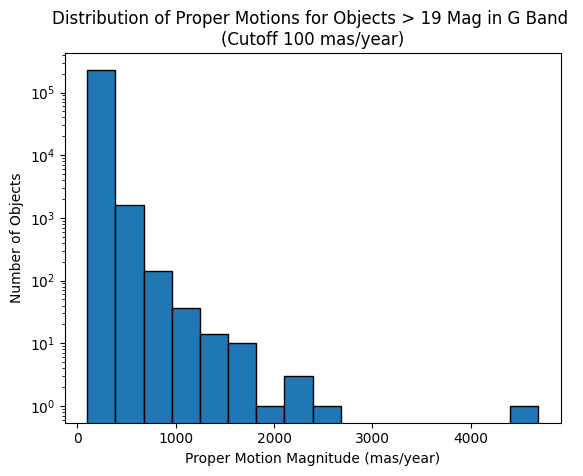

In [8]:
fig, ax = plt.subplots()
ax.hist(gaia_pm_greater_100['pm_total'], bins=16, edgecolor = "black")
ax.set_yscale('log')
ax.set_xlabel('Proper Motion Magnitude (mas/year)')
ax.set_ylabel('Number of Objects')
ax.set_title('Distribution of Proper Motions for Objects > 19 Mag in G Band \n(Cutoff 100 mas/year)')
# "Dim" is > 19

In [12]:
CATALOG_DIR = Path("../../../catalogs")
GAIA_1000_NAME = 'gaia_dr3_pm_greater_1000'
GAIA_1000_DIR = CATALOG_DIR / GAIA_1000_NAME

gaia_pm_greater_1000_f = lsdb.read_hats(GAIA_1000_DIR).query('phot_g_mean_mag > 19 or phot_g_mean_mag.isna()').compute()
print(len(gaia_pm_greater_1000_f))

18
